# Parte 1


In [155]:
# import matplot lib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from openpyxl import Workbook
from numpy.polynomial import Polynomial


# openpyxl

## Leer datos de exel


In [156]:
df = None  # Definir variable del exel

# Pedirle nombre del exel al usuario y cargarlo
while False:
    try:
        exel = input("Nombre del archivo de exel (data.xlsx)")
        df = pd.read_excel(exel)
        break
    except:
        print("Nombre invalido ")


df = pd.read_excel("data.xlsx")


# Leer puntos del exel
x = df["x"].values
y = df["y"].values

## Usando polyfit()


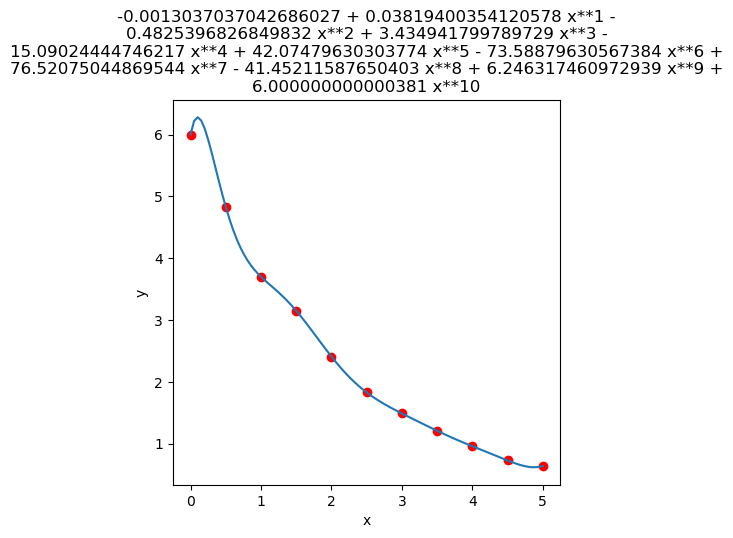

In [157]:
INTERVAL = np.linspace(0, 5, 100)

# Calcular el polinomio de Lagrange con la funcion polyfit
p = np.polyfit(x, y, deg=len(x) - 1)

# Crear plot
fig, ax = plt.subplots(figsize=(5, 5))

# Configuracion de plot
ax.set(title=Polynomial(p), xlabel="x", ylabel="y")

# Plotear puntos de exel
ax.scatter(x, y, c="r")

# Plotear puntos con el polinomio de Lagrange
ax.plot(
    INTERVAL,
    np.polyval(p, INTERVAL),
)

## De manera procedimental


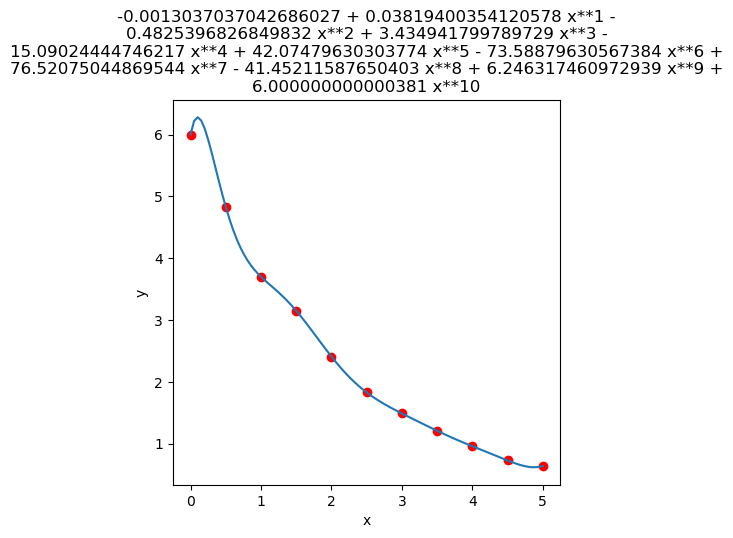

In [158]:
def lagrange(eval):
    n = len(x)  # Número de puntos
    result = 0  # Resultado final

    for i in range(n):
        term = y[i]  # Término actual del polinomio de Lagrange
        for j in range(n):
            if j != i:
                term = (
                    term * (eval - x[j]) / (x[i] - x[j])
                )  # Producto de términos individuales

        result += term  # Agregar el término al resultado final

    return result  # Devolver el resultado


# Crear plot
fig, ax = plt.subplots(figsize=(5, 5))

# Configuracion de plot
ax.set(title=Polynomial(p), xlabel="x", ylabel="y")

# Plotear puntos de exel
ax.scatter(x, y, c="r")

# Plotear puntos con el polinomio de Lagrange
ax.plot(
    INTERVAL,
    list(
        map(lagrange, INTERVAL),
    ),
)

## Salvar resultados a exel


In [159]:
# Guardar los resultados en el archivo de Excel

wb = Workbook()
ws = wb.active

ws["A1"] = "x"
ws["B1"] = "y"
ws["C1"] = "Polinomio de Lagrange"
ws["C2"] = str(Polynomial(p))

for i in range(len(INTERVAL)):
    ws.cell(row=i + 2, column=1, value=INTERVAL[i])
    ws.cell(
        row=i + 2,
        column=2,
        value=list(map(lagrange, INTERVAL))[i],
    )


wb.save("test.xlsx")

# Parte 2


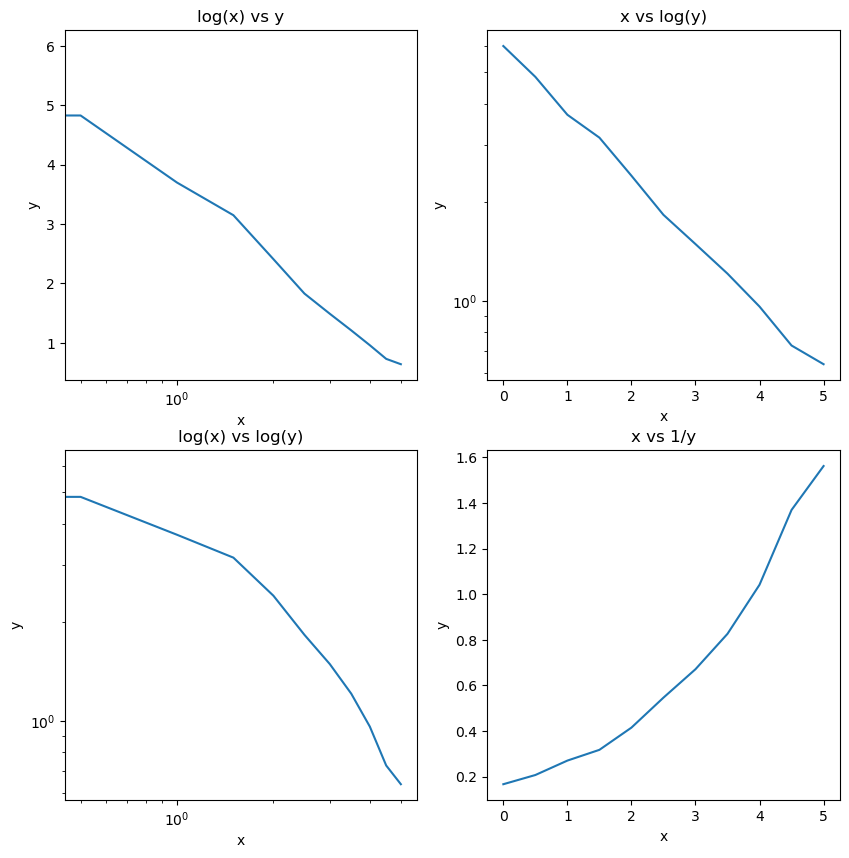

In [160]:
# Crear una figura con 2 filas y 2 columnas
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Gráfico 1: log(x) vs y
ax[0, 0].set(title="log(x) vs y", xlabel="x", ylabel="y")
ax[0, 0].semilogx(x, y)

# Gráfico 2: x vs log(y)
ax[0, 1].set(title="x vs log(y)", xlabel="x", ylabel="y")
ax[0, 1].semilogy(x, y)

# Gráfico 3: log(x) vs log(y)
ax[1, 0].set(title="log(x) vs log(y)", xlabel="x", ylabel="y")
ax[1, 0].loglog(x, y)

# Gráfico 4: x vs 1/y
ax[1, 1].set(title="x vs 1/y", xlabel="x", ylabel="y")
ax[1, 1].plot(x, 1 / y)

C:\Users\Gatuno7000\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Gatuno7000\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Gatuno7000\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


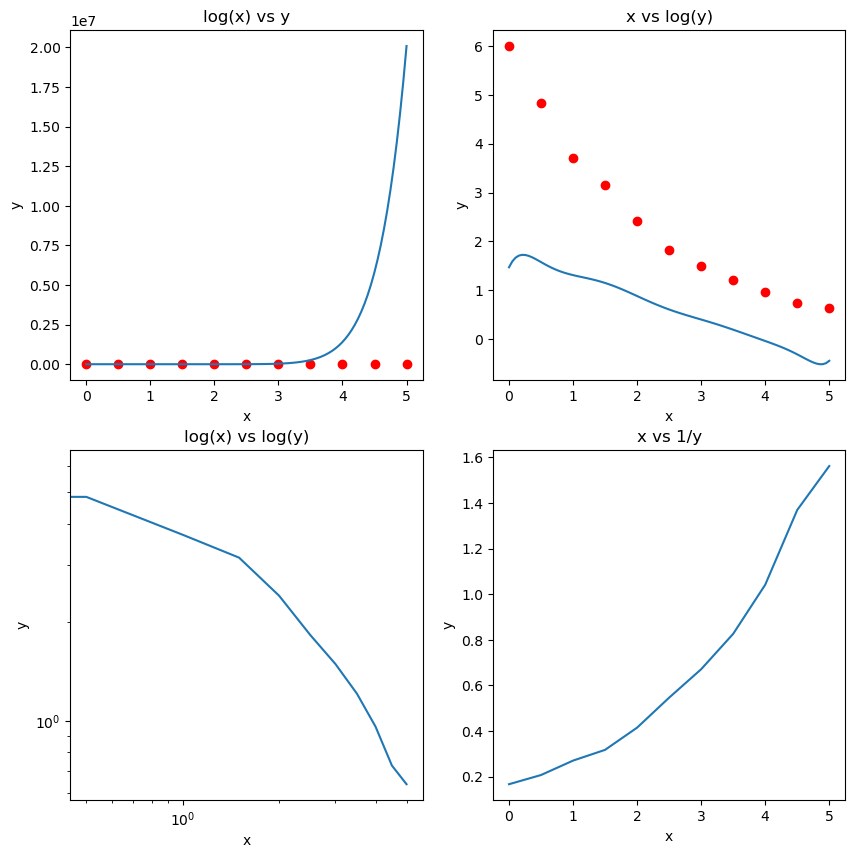

In [166]:
# Calcular el polinomio de Lagrange con la funcion polyfit
p_po = np.polyfit(
    np.log(x[(x > 0) & (y > 0)]), np.log(y[(x > 0) & (y > 0)]), deg=len(x) - 1
)
p_ex = np.polyfit(x[(x > 0) & (y > 0)], np.log(y[(x > 0) & (y > 0)]), deg=len(x) - 1)
p_lo = np.polyfit(np.log(x[(x > 0) & (y > 0)]), y[(x > 0) & (y > 0)], deg=len(x) - 1)
p_re = np.polyfit(x, 1 / y, deg=len(x) - 1)


# Crear una figura con 2 filas y 2 columnas
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Gráfico 1: log(x) vs y
ax[0, 0].set(title="log(x) vs y", xlabel="x", ylabel="y")
ax[0, 0].plot(
    INTERVAL,
    np.polyval(p_po, INTERVAL),
)
ax[0, 0].scatter(x, y, c="r")


# Gráfico 2: x vs log(y)
ax[0, 1].set(title="x vs log(y)", xlabel="x", ylabel="y")
ax[0, 1].plot(
    INTERVAL,
    np.polyval(p_ex, INTERVAL),
)
ax[0, 1].scatter(x, y, c="r")


# Gráfico 3: log(x) vs log(y)
ax[1, 0].set(title="log(x) vs log(y)", xlabel="x", ylabel="y")
ax[1, 0].loglog(x, y)

# Gráfico 4: x vs 1/y
ax[1, 1].set(title="x vs 1/y", xlabel="x", ylabel="y")
ax[1, 1].plot(x, 1 / y)

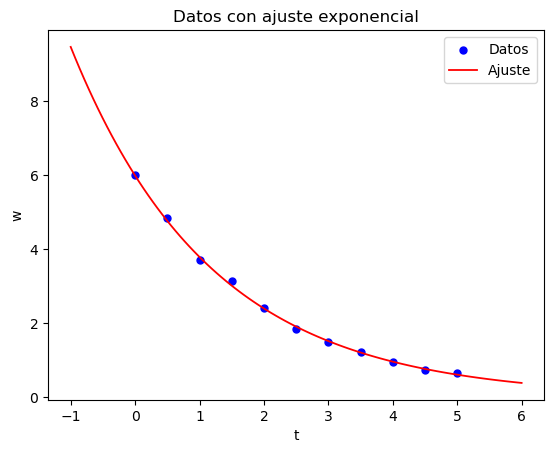

In [167]:
import numpy as np
import matplotlib.pyplot as plt

t = x
w = y
p = np.polyfit(t, np.log(w), 1)  # Create the necessary linear fit
m = p[0]
b = np.exp(p[1])  # Determine the parameters of the exponential fit

x = np.linspace(-1, 6, 100)  # Create x values for the plot
y = b * np.exp(m * x)  # Create the symbolic expression of the model

plt.scatter(
    t, w, color="blue", marker="o", facecolors="blue", s=25
)  # Scatter plot of the data
plt.plot(x, y, linewidth=1.3, color="red")  # Plot the fit

plt.xlabel("t")
plt.ylabel("w")
plt.title("Datos con ajuste exponencial")
plt.legend(["Datos", "Ajuste"])
plt.show()